# 一元回归

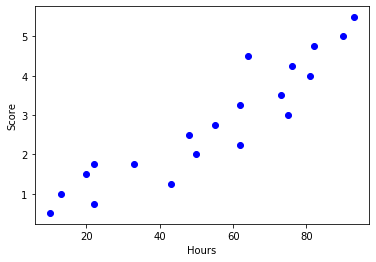

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame,Series
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

examDict ={'学习时间':[0.50,0.75,1.00,1.25,1.50,1.75,1.75,2.00,2.25,2.50,2.75,3.00,3.25,3.50,4.00,4.25,4.50,4.75,5.00,5.50], '分数':[10,22,13,43,20,22,33,50,62, 48,55,75,62,73,81,76,64,82,90,93]}
#转换为DataFrame的数据格式
examDf = DataFrame(examDict)
plt.scatter(examDf.分数,examDf.学习时间,color = 'b',label = "Exam Data")
plt.xlabel("Hours")
plt.ylabel("Score")
plt.show()

In [3]:
rDf = examDf.corr()
print(rDf)

          学习时间        分数
学习时间  1.000000  0.923985
分数    0.923985  1.000000


In [4]:
exam_X = examDf.分数
exam_Y = examDf.学习时间
X_train,X_test,Y_train,Y_test = train_test_split(exam_X,exam_Y,train_size=.8)
#X_train为训练数据标签,X_test为测试数据标签,exam_X为样本特征,exam_y为样本标签，train_size 训练数据占比
print("原始数据特征:",exam_X.shape,      ",训练数据特征:",X_train.shape,      ",测试数据特征:",X_test.shape) 
print("原始数据标签:",exam_Y.shape,      ",训练数据标签:",Y_train.shape,      ",测试数据标签:",Y_test.shape) 

原始数据特征: (20,) ,训练数据特征: (16,) ,测试数据特征: (4,)
原始数据标签: (20,) ,训练数据标签: (16,) ,测试数据标签: (4,)


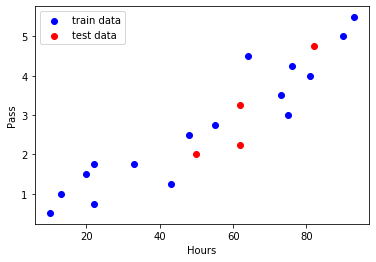

In [5]:
plt.scatter(X_train, Y_train, color="blue", label="train data")
plt.scatter(X_test, Y_test, color="red", label="test data") 

plt.legend(loc=2)
plt.xlabel("Hours")
plt.ylabel("Pass")
plt.show()

In [6]:
model = LinearRegression()
X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)
model.fit(X_train,Y_train)
a  = model.intercept_
b = model.coef_
print("最佳拟合线:截距",a,",回归系数：",b)

最佳拟合线:截距 0.04608574234333718 ,回归系数： [0.05227705]


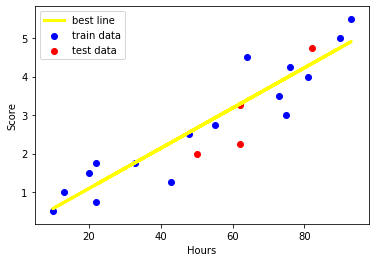

0.6389299720775724


In [7]:
#训练数据的预测值
y_train_pred = model.predict(X_train)
#绘制最佳拟合线：标签用的是训练数据的预测值y_train_pred
plt.plot(X_train, y_train_pred, color='yellow', linewidth=3, label="best line") 
#测试数据散点图
plt.scatter(X_train, Y_train, color="blue", label="train data")
plt.scatter(X_test, Y_test, color='red', label="test data") 
#添加图标标签
plt.legend(loc=2)
plt.xlabel("Hours")
plt.ylabel("Score")
plt.show()  
score = model.score(X_test,Y_test) 
print(score)

# 多元回归

In [8]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [9]:
#通过read_csv读数据集
adv_data = pd.read_csv("test4.csv")
#清洗不需要的数据
new_adv_data = adv_data.iloc[:,1:]
#得到数据集且查看
print('head:',new_adv_data.head(),'\nShape:',new_adv_data.shape)

head:    radio  newspaper  sales
0   37.8       69.2   22.1
1   39.3       45.1   10.4
2   45.9       69.3    9.3
3   41.3       58.5   18.5
4   10.8       58.4   12.9 
Shape: (200, 3)


In [10]:
print(new_adv_data.describe())

            radio   newspaper       sales
count  200.000000  200.000000  200.000000
mean    23.264000   30.554000   14.022500
std     14.846809   21.778621    5.217457
min      0.000000    0.300000    1.600000
25%      9.975000   12.750000   10.375000
50%     22.900000   25.750000   12.900000
75%     36.525000   45.100000   17.400000
max     49.600000  114.000000   27.000000


In [11]:
#缺失值检验
print(new_adv_data[new_adv_data.isnull()==True].count())

radio        0
newspaper    0
sales        0
dtype: int64


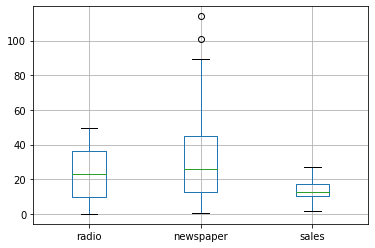

In [12]:
new_adv_data.boxplot()
plt.show()

In [13]:
print(new_adv_data.corr())

              radio  newspaper     sales
radio      1.000000   0.354104  0.576223
newspaper  0.354104   1.000000  0.228299
sales      0.576223   0.228299  1.000000


In [14]:
X_train,X_test,Y_train,Y_test = train_test_split(new_adv_data.iloc[:,:3],new_adv_data.sales,train_size=.80)
print("原始数据特征:",new_adv_data.iloc[:,:3].shape, ",训练数据特征:",X_train.shape,",测试数据特征:",X_test.shape)
print("原始数据标签:",new_adv_data.sales.shape,",训练数据标签:",Y_train.shape,",测试数据标签:",Y_test.shape)

原始数据特征: (200, 3) ,训练数据特征: (160, 3) ,测试数据特征: (40, 3)
原始数据标签: (200,) ,训练数据标签: (160,) ,测试数据标签: (40,)


In [15]:
model = LinearRegression()
model.fit(X_train,Y_train)
a  = model.intercept_
b = model.coef_
print("最佳拟合线:截距",a,",回归系数：",b)

最佳拟合线:截距 -7.105427357601002e-15 ,回归系数： [1.99927186e-18 1.11022302e-16 1.00000000e+00]


In [16]:
score = model.score(X_test,Y_test)
print(score)

1.0


In [17]:
Y_pred = model.predict(X_test)
print(Y_pred)

[ 1.6  7.3  7.2 18.   9.7 10.1  9.7 18.4  9.5 15.2 10.3 26.2 17.1  8.7
  7.6 17.  20.7 12.2  8.4 13.2 14.9 18.9 15.9  9.9 16.9 16.6 12.9 10.1
 11.6 17.1 10.1 15.9 19.6  7.6 13.6 11.9 14.1 12.  14.7  8.7]


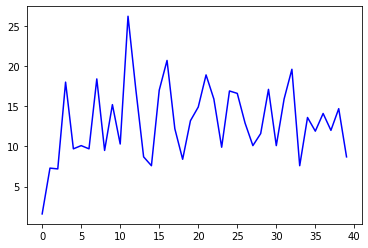

In [18]:
plt.plot(range(len(Y_pred)),Y_pred,'b',label="predict")
plt.show()

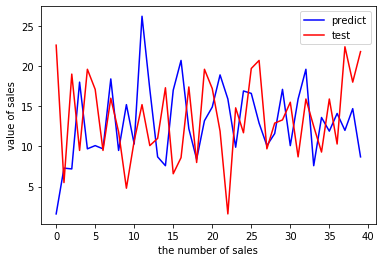

In [19]:
Y_pred = model.predict(X_test)
X_train,X_test,Y_train,Y_test = train_test_split(new_adv_data.iloc[:,:3],new_adv_data.sales,train_size=.80)

plt.figure()
plt.plot(range(len(Y_pred)),Y_pred,'b',label="predict")
plt.plot(range(len(X_test)),Y_test,'r',label="test")
plt.legend(loc="upper right")
plt.xlabel("the number of sales")
plt.ylabel('value of sales')
plt.show()

In [20]:
import numpy as np
from sklearn import linear_model
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [21]:
xx, yy = np.meshgrid(np.linspace(0,10,10), np.linspace(0,100,10))
zz = 1.0 * xx + 3.5 * yy + np.random.randint(0,100,(10,10))
X, Z = np.column_stack((xx.flatten(),yy.flatten())), zz.flatten()
regr = linear_model.LinearRegression()
regr.fit(X, Z)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
a=regr.intercept_
b=regr.coef_

[4859.84436364 4862.86712727]
[327.55373818]


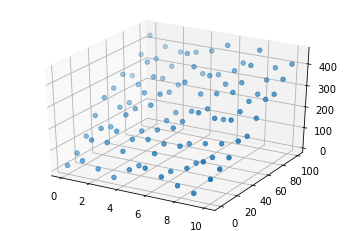

In [28]:
x = np.array([[5.8, 78.3]])
print(np.sum(a * x) + b)
print(regr.predict(x))
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(xx,yy,zz)
plt.show()